# Predict a Doctors Consultation Fees 

<font color=blue>We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if we have data that records important details about a doctor and we get to build a model to predict the doctor’s consulting fee.?</font>

In here we will use Machine Learning models to predict a Doctors consultation Fees .


**Qualification:**                   Qualification and degrees held by the doctor<br>
**Experience:**                      Experience of the doctor in number of years<br>
**Rating:**                          Rating given by patients<br>
**Profile:**                         Type of the doctor<br>
**Miscellaeous_Info:**               Extra information about the doctor<br>
**Fees:**                            Fees charged by the doctor<br>
**Place:**                           Area and the city where the doctor is located.<br>

# Importing Libraries 

In [577]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error , mean_squared_log_error
from math import sqrt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import  ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler 
import warnings 
warnings.filterwarnings('ignore')


# Getting the data

In [578]:
ddf = pd.read_excel('Final_Test.xlsx')
ddf_test = pd.read_excel('Sample_submission.xlsx')

In [579]:
ddf

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [580]:
ddf_test

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091
...,...
1982,2352
1983,1653
1984,2063
1985,2541


# Exploratory Data Analysis

In [581]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


 Checking for Null values

In [582]:
ddf.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Counting Unique values of each feature.


In [583]:
print('Qualification:', ddf['Qualification'].nunique())
print('Experience:', ddf['Experience'].nunique())
print('Rating:', ddf['Rating'].nunique())
print('Place:', ddf['Place'].nunique())
print('Profile', ddf['Profile'].nunique())

Qualification: 630
Experience: 57
Rating: 36
Place: 592
Profile 6


# Data Preprocessing

In [584]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


**Qualification**

In [585]:
ddf['Qualification']

0                                                  MBBS
1            MBBS, Diploma in Otorhinolaryngology (DLO)
2                                            MBBS, DDVL
3                                                  BAMS
4       BDS, MDS - Conservative Dentistry & Endodontics
                             ...                       
1982                           BAMS, Doctor of Medicine
1983     MD - Dermatology , Venereology & Leprosy, MBBS
1984           MBBS, MD / MS - Obstetrics & Gynaecology
1985                                                BDS
1986     MBBS, MD - Dermatology , Venereology & Leprosy
Name: Qualification, Length: 1987, dtype: object

This module provides regular expression matching operations similar to those found in Perl.

[Learn_about_re](https://docs.python.org/3/library/re.html)

[re_expressions](https://www.tutorialspoint.com/python/python_reg_expressions.htm)

Kindly open the links above to learn more about re (Regular Expressions).

In [586]:
import re
def clean_text(text):
    text = str(text).lower()
    
    # re.sub
    #This method replaces all occurrences of the RE pattern in string with repl, 
    #substituting all occurrences unless max provided.
    #Here we are replacing patterns with spaces.
    
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [587]:
ddf['Qualification'] = ddf['Qualification'].apply(clean_text)

In [588]:
a = ddf['Qualification']

From above we can observe that all the . , or any patterns are replaced by ' ' in the Qualiffication feature .

**Experience**

Replacing year experience with a space from Experience feature and converting its datatype to int.

In [589]:
ddf['Experience'] = ddf['Experience'].str.replace('years experience','').astype(int)


In [590]:
ddf['Experience'].value_counts()

10    110
8      98
9      96
19     92
7      89
11     86
13     83
14     81
12     79
17     72
18     70
6      62
15     57
16     51
5      50
23     49
21     48
20     48
29     46
4      44
22     37
24     34
3      33
25     33
26     32
0      31
28     29
27     27
34     27
36     27
31     26
38     23
30     18
32     16
44     16
40     15
37     14
39     13
35     13
41     12
33     11
2      11
46     11
42     10
43     10
47      9
49      8
45      7
48      6
59      4
50      3
51      3
52      2
54      2
53      1
56      1
65      1
Name: Experience, dtype: int64

In [591]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ddf['Experience'] = le.fit_transform(ddf['Experience'])

In [592]:
ddf['Experience']

0       34
1       30
2       39
3        0
4       15
        ..
1982     9
1983     3
1984     8
1985    11
1986     7
Name: Experience, Length: 1987, dtype: int64

In [593]:
ddf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,mbbs,34,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,mbbs diploma in otorhinolaryngology dlo,30,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,mbbs ddvl,39,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,bams,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,bds mds conservative dentistry endodontics,15,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


**Rating**

In [594]:
ddf['Rating']

0        NaN
1        NaN
2        70%
3        NaN
4       100%
        ... 
1982     NaN
1983     NaN
1984     NaN
1985     98%
1986     NaN
Name: Rating, Length: 1987, dtype: object

Filling the Null vallues with 0%.

In [595]:
ddf['Rating'].fillna('0%', inplace=True)

In [596]:
def clean_rating(text):
    text = re.sub(r'%', '', str(text))
    return text

In [597]:
ddf['Rating'] = ddf['Rating'].apply(clean_rating)

#Converting the datatype to int
ddf['Rating'] = ddf['Rating'].astype(int)

In [598]:
le = LabelEncoder()
ddf['Rating']= le.fit_transform(ddf['Rating'])

In [599]:
ddf['Rating']

0        0
1        0
2        9
3        0
4       36
        ..
1982     0
1983     0
1984     0
1985    34
1986     0
Name: Rating, Length: 1987, dtype: int64

From above we can observe that we have successfully removed all the % sign and filled the missing values.

**Place**

In [600]:
ddf['Place']

0            Ghatkopar East, Mumbai
1       West Marredpally, Hyderabad
2                 KK Nagar, Chennai
3            New Ashok Nagar, Delhi
4         Kanakpura Road, Bangalore
                   ...             
1982        Basavanagudi, Bangalore
1983               Choolai, Chennai
1984                 Porur, Chennai
1985             Arekere, Bangalore
1986          Pallikaranai, Chennai
Name: Place, Length: 1987, dtype: object

In [601]:
ddf['Place'].value_counts()

Mulund West, Mumbai          27
Andheri West, Mumbai         27
Dwarka, Delhi                26
Whitefield, Bangalore        23
HSR Layout, Bangalore        22
                             ..
Vyasarpadi, Chennai           1
Aya Nagar, Delhi              1
Chetpet, Chennai              1
Pollachi, Coimbatore          1
Yellareddyguda, Hyderabad     1
Name: Place, Length: 592, dtype: int64

For Place feature we will do the same as we had done for Qualification feature.

In [602]:
def clean_place(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

Replacing the Null values with missing and applying above finction to replace patterns with spaces.

In [603]:
ddf['Place'].fillna('missing', inplace=True)
ddf['Place'] = ddf['Place'].apply(clean_place)

In [604]:
le = LabelEncoder()
ddf['Place'] = le.fit_transform(ddf['Place'])

In [605]:
ddf['Place']

0       142
1       581
2       258
3       375
4       227
       ... 
1982     54
1983     95
1984    425
1985     25
1986    395
Name: Place, Length: 1987, dtype: int32

**Profile**

In [606]:
ddf['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In tis feature we can see that there are 5 various datas so we will use LabelEncoder for this .

In [607]:
ddf['Profile'].isnull().sum()

0

In [608]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ddf['Profile'] = le.fit_transform(ddf['Profile'])

In [609]:
ddf['Profile'].value_counts()

4    444
1    441
2    339
5    277
0    251
3    235
Name: Profile, dtype: int64

We hav sucessfully encoded all the datas.

**Values assigned while encoding**<br>
Ayurveda            0<br>
Dentist             1<br>
Dermatologists      2<br>
ENT Specialist      3<br>
General Medicine    4<br>
Homeopath           5<br>

In [610]:
ddf.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,mbbs,34,0,142,4,NaN
1,mbbs diploma in otorhinolaryngology dlo,30,0,581,3,NaN
2,mbbs ddvl,39,9,258,2,"70% 4 Feedback KK Nagar, Chennai"
3,bams,0,0,375,0,NaN
4,bds mds conservative dentistry endodontics,15,36,227,1,General Dentistry Conservative Dentistry Cosme...
5,bds mds,13,26,555,1,Acrylic Partial Denture Impaction / Impacted T...
6,mbbs diploma in otorhinolaryngology dlo,22,30,134,3,"94% 6 Feedback Frazer Town, Bangalore"
7,bds mds pedodontics,8,30,31,1,RCT - Root Canal Treatment Ceramic Veneers / C...
8,md ayurveda medicine bams yoga teachers traini...,10,35,47,0,"99% 203 Feedback Banashankari, Bangalore"
9,bhms,43,0,323,5,NaN


**Miscellaneous Info**

Here in miscellaneous_info feature there are number of informations we can extrat . Now let's see what we can etract from this feature.

In [611]:
ddf['Miscellaneous_Info']

0                                                     NaN
1                                                     NaN
2                        70% 4 Feedback KK Nagar, Chennai
3                                                     NaN
4       General Dentistry Conservative Dentistry Cosme...
                              ...                        
1982                                                  NaN
1983                                                  NaN
1984                                                  NaN
1985    RCT - Root Canal Treatment Root Canal Treatmen...
1986                1 Feedback Pallikaranai, Chennai ₹500
Name: Miscellaneous_Info, Length: 1987, dtype: object

In [612]:
ddf['Miscellaneous_Info'].isnull().sum()

834

Filling the Null values with missing.

In [613]:
ddf['Miscellaneous_Info'].fillna('missing', inplace=True)

In here we are finding the string Feedback and the word preceding it.

In [614]:
def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    
    #if the feedback is preceding by nothing we will append 
    # 0 Feedback or else return the 0th index value.
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

Here we are creating a new feature naming Feedback which has the a integer value of the feedbacks given.<br> Replacing the Feedback string with '' from the Feedback feature and converting its datatype to int . 

In [615]:
ddf['Feedback'] = ddf['Miscellaneous_Info'].apply(get_feedback)
ddf['Feedback'] = ddf['Feedback'].str.replace(' Feedback','')
ddf['Feedback'] = ddf['Feedback'].astype(int)

In [616]:
ddf

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Feedback
0,mbbs,34,0,142,4,missing,0
1,mbbs diploma in otorhinolaryngology dlo,30,0,581,3,missing,0
2,mbbs ddvl,39,9,258,2,"70% 4 Feedback KK Nagar, Chennai",4
3,bams,0,0,375,0,missing,0
4,bds mds conservative dentistry endodontics,15,36,227,1,General Dentistry Conservative Dentistry Cosme...,0
...,...,...,...,...,...,...,...
1982,bams doctor of medicine,9,0,54,0,missing,0
1983,md dermatology venereology leprosy mbbs,3,0,95,2,missing,0
1984,mbbs md ms obstetrics gynaecology,8,0,425,4,missing,0
1985,bds,11,34,25,1,RCT - Root Canal Treatment Root Canal Treatmen...,0


Here we are creating a function which will replace the , with " " and finding all the datas which has rupees sign in it and if the value proceding rupees sign is not empty return 0th index value or else return 0 only.

In [617]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0

Here we are creating a new feature with Misc_Fees name. It has the fees Miscellaneous fees which is extracted from the Miscellaneous_Info feature .<br> Filling all the NaN value with 50 and converting its datatype .

In [618]:
ddf['Misc_Fees'] = ddf['Miscellaneous_Info'].apply(get_fee)
ddf['Misc_Fees'] = ddf['Misc_Fees'].str.replace('₹','')
ddf['Misc_Fees'].fillna(0, inplace=True)
ddf['Misc_Fees'] = ddf['Misc_Fees'].astype(int)

In [619]:
ddf

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Feedback,Misc_Fees
0,mbbs,34,0,142,4,missing,0,0
1,mbbs diploma in otorhinolaryngology dlo,30,0,581,3,missing,0,0
2,mbbs ddvl,39,9,258,2,"70% 4 Feedback KK Nagar, Chennai",4,0
3,bams,0,0,375,0,missing,0,0
4,bds mds conservative dentistry endodontics,15,36,227,1,General Dentistry Conservative Dentistry Cosme...,0,0
...,...,...,...,...,...,...,...,...
1982,bams doctor of medicine,9,0,54,0,missing,0,0
1983,md dermatology venereology leprosy mbbs,3,0,95,2,missing,0,0
1984,mbbs md ms obstetrics gynaecology,8,0,425,4,missing,0,0
1985,bds,11,34,25,1,RCT - Root Canal Treatment Root Canal Treatmen...,0,0


Lower casing Miscellaneous_Info column <br> repalcing patterns with ' ' .

In [620]:
def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [621]:
ddf['Miscellaneous_Info'] = ddf['Miscellaneous_Info'].apply(clean_misc)

In [622]:
ddf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Feedback,Misc_Fees
0,mbbs,34,0,142,4,missing,0,0
1,mbbs diploma in otorhinolaryngology dlo,30,0,581,3,missing,0,0
2,mbbs ddvl,39,9,258,2,70 4 feedback kk nagar chennai,4,0
3,bams,0,0,375,0,missing,0,0
4,bds mds conservative dentistry endodontics,15,36,227,1,general dentistry conservative dentistry cosme...,0,0


In [623]:
x = ddf

In [624]:
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Feedback,Misc_Fees
0,mbbs,34,0,142,4,missing,0,0
1,mbbs diploma in otorhinolaryngology dlo,30,0,581,3,missing,0,0
2,mbbs ddvl,39,9,258,2,70 4 feedback kk nagar chennai,4,0
3,bams,0,0,375,0,missing,0,0
4,bds mds conservative dentistry endodontics,15,36,227,1,general dentistry conservative dentistry cosme...,0,0


From above we can observe that we have successfully refined our data for our future predictions . Now we will check for skewness in our dataset.

## **Skewness**

<AxesSubplot:xlabel='Experience', ylabel='Density'>

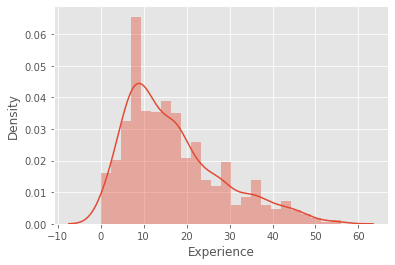

In [625]:
sns.distplot(ddf['Experience'])

In [626]:
ddf['Experience'].skew()

0.9510282716386016

In [627]:
ddf['Experience']= np.sqrt(ddf['Experience'])

In [628]:
ddf['Experience'].skew()

0.06052593002543377

From above we can observe that we have sucessfully removed the skewness in the dataset.

**Rating**

In [629]:
ddf['Rating'].skew()

0.36092068725823095

<AxesSubplot:xlabel='Rating', ylabel='Density'>

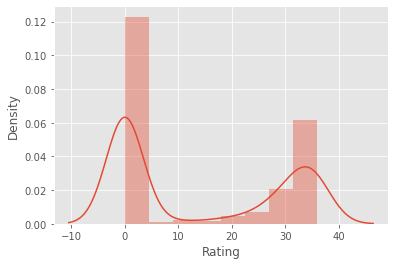

In [630]:
sns.distplot(ddf['Rating'])

From above we can see that Rating feature has 0.33 skewness , i.e < 0.5 , so we don't need to do anything with this feature .

**Place**

In [631]:
ddf['Place'].skew()

0.039610892193958545

From above we can see that Place feature has 0.11 skewness , i.e < 0.5 , so we don't need to do anything with this feature .

**Profile**

In [632]:
ddf['Profile'].skew()

0.028925802279867626

From above we can see that Place feature has 0.1 skewness , i.e < 0.5 , so we don't need to do anything with this feature .

**Feedback**

In [633]:
ddf['Feedback'].skew()

19.44961691117009

<AxesSubplot:xlabel='Feedback', ylabel='Density'>

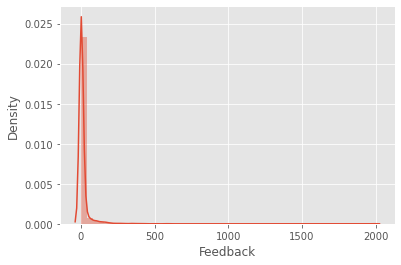

In [634]:
sns.distplot(ddf['Feedback'])

In [635]:
ddf['Feedback'].value_counts()

0      1401
2        38
1        35
3        30
4        29
       ... 
144       1
145       1
149       1
156       1
80        1
Name: Feedback, Length: 138, dtype: int64

From above we can observe that this Feedback feature is highly skewed and the values  are so less not constituting mu

In [636]:
le = LabelEncoder()
ddf['Feedback'] = le.fit_transform(ddf['Feedback'])

In [637]:
ddf['Feedback'].skew()

3.606979048544838

<AxesSubplot:xlabel='Feedback', ylabel='Density'>

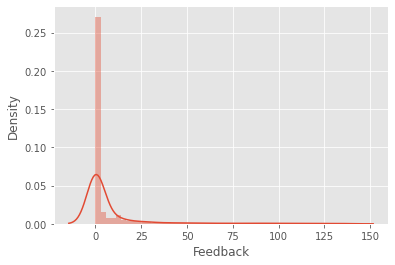

In [638]:
sns.distplot(ddf['Feedback'])

In [639]:
ddf['Feedback'] = np.sqrt(ddf['Feedback'])

In [640]:
ddf['Feedback'].skew()

2.1639184670880933

From above we can observe that this Feedback feature is highly skewed and the values are so less and will not constitute in our future predictions. So we will drop this feature from our Dataset.

In [641]:
ddf = ddf.drop('Feedback' , axis = 1)

In [642]:
ddf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Misc_Fees
0,mbbs,5.830952,0,142,4,missing,0
1,mbbs diploma in otorhinolaryngology dlo,5.477226,0,581,3,missing,0
2,mbbs ddvl,6.244998,9,258,2,70 4 feedback kk nagar chennai,0
3,bams,0.000000,0,375,0,missing,0
4,bds mds conservative dentistry endodontics,3.872983,36,227,1,general dentistry conservative dentistry cosme...,0


**Misc_Fees**

In [643]:
ddf['Misc_Fees'].skew()

9.839869568010174

In [644]:
ddf['Misc_Fees'].value_counts()

0       1910
500       14
250       10
1000       9
600        6
1500       6
300        6
200        5
1200       4
700        4
100        2
800        2
150        2
400        2
2000       1
350        1
650        1
3500       1
550        1
Name: Misc_Fees, dtype: int64

From above observations we can observe that almost 97% of the values are 0 of Misc_Fees feature , So we can drop this feature .

In [645]:
ddf = ddf.drop('Misc_Fees' , axis = 1)

In [646]:
ddf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,mbbs,5.830952,0,142,4,missing
1,mbbs diploma in otorhinolaryngology dlo,5.477226,0,581,3,missing
2,mbbs ddvl,6.244998,9,258,2,70 4 feedback kk nagar chennai
3,bams,0.000000,0,375,0,missing
4,bds mds conservative dentistry endodontics,3.872983,36,227,1,general dentistry conservative dentistry cosme...


In [647]:
columns = ['Experience' , 'Rating' , 'Place' , 'Profile' , 'Feedback' , 'Misc_Fees'] 

**Target Variable** 

In [648]:
y = ddf_test

In [649]:
y

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091
...,...
1982,2352
1983,1653
1984,2063
1985,2541


**Tf  Idf Vectorizer**

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

[To_read_more_about_TfIdf Vectorizer](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a)

Here we are applying TfIdf vectorizer to our three features <br>Qualification<br>Place<br>Miscellaneous_Info<br>

In [650]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
x_Qualification = tf1.fit_transform(x['Qualification'])

In [651]:
# tf2 = TfidfVectorizer()
# x_Place = tf2.fit_transform(x['Place'])

In [652]:
tf3 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
x_Miscellaneous_Info = tf3.fit_transform(x['Miscellaneous_Info'])

Here we are just creating a new array with our features and reshaping it and assigning it to a new variable.

In [653]:
x_Experience = np.array(x['Experience']).reshape(-1,1)

In [654]:
x_Rating = np.array(x['Rating']).reshape(-1,1)

In [655]:
x_Place = np.array(x['Place']).reshape(-1,1)

In [656]:
x_Profile = np.array(x['Profile']).reshape(-1,1)

*Hstack*

Stack arrays in sequence horizontally (column wise).

[To_Learn_more_about_Hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)

In [657]:
from scipy.sparse import hstack
x_train = hstack((x_Qualification, x_Experience, x_Rating , 
                       x_Place, x_Profile, x_Miscellaneous_Info ,  ))

In [658]:
x_train.shape

(1987, 5010)

**One can use below codes to find the best ramdom state , unfortunately my system is not capable of performing a loop of random forest for such big data**.

In [659]:
# best_score=0
# for i in range(20):
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(x_train , y, test_size = 0.2, random_state = i)
#     rf = RandomForestRegressor()
#     rf.fit(X_train,y_train)
#     y_predicted = rf.predict(X_test)
#     b_score= r2_score(y_test ,y_predicted )
#     if b_score>best_score:
#         best_score=b_score
#         randomState=i
    
# print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Finding scores of different regression models. 

In [660]:
X_train, X_test, y_train, y_test = train_test_split(x_train , y, train_size=0.7, test_size=0.3, random_state= 42)

model_reg = [LinearRegression,RandomForestRegressor, SVR, DecisionTreeRegressor,KNeighborsRegressor, GradientBoostingRegressor,
             ExtraTreeRegressor , Lasso , Ridge , ElasticNet]


for model in model_reg:
    m = model()
    print('\n''Model: ',m)
    m.fit(X_train, y_train)
    scr=m.score(X_train,y_train)
    score = (m.score(X_test , y_test))
    print('\n''-->''Score:',score)
    scr_cross=cross_val_score(m,x_train,y,cv=5)
    scr_mean=scr_cross.mean()
    print('Cross validation score: ',scr_mean)
    print('Difference between accuracy and cross validation score: ', scr-scr_mean)
    y_predicted = m.predict(X_test)
    print('Mean Absolute Error: ',mean_absolute_error(y_test, y_predicted))
    print('R2 Score' , r2_score(y_test , y_predicted))


Model:  LinearRegression()

-->Score: -1.9432293807006018
Cross validation score:  -1.252085836897245
Difference between accuracy and cross validation score:  1.9641455068359637
Mean Absolute Error:  445.60500927527346
R2 Score -1.9432293807006018

Model:  RandomForestRegressor()

-->Score: -0.102213348767354
Cross validation score:  -0.13157340302061024
Difference between accuracy and cross validation score:  0.9717360534130444
Mean Absolute Error:  301.7093042593922
R2 Score -0.102213348767354

Model:  SVR()

-->Score: -7.851546947423849e-05
Cross validation score:  -0.0047193208102617405
Difference between accuracy and cross validation score:  0.004703812808046904
Mean Absolute Error:  288.6701416359268
R2 Score -7.851546947423849e-05

Model:  DecisionTreeRegressor()

-->Score: -0.9717819279192315
Cross validation score:  -0.9805574952232388
Difference between accuracy and cross validation score:  1.976413127363198
Mean Absolute Error:  393.356783919598
R2 Score -0.9717819279192315

In [661]:
X_train,X_test,y_train,y_test=train_test_split(x_train,y,test_size=.30,random_state=42)

In [662]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1390, 5010), (597, 5010), (1390, 1), (597, 1))

Applying Algorithms.

**Random Forest Regressor**

In [663]:
X_train, X_test, y_train, y_test = train_test_split(x_train , y, test_size = 0.3, random_state = 42)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('RMSLE:', sqrt(mean_squared_log_error(y_test, rf_pred)))

RMSLE: 0.19277051846510995


**AdaBoostRegressor**

In [664]:
from sklearn.ensemble import AdaBoostRegressor

X_train,X_test,y_train,y_test=train_test_split(x_train,y,test_size=.30,random_state=42)

ab = AdaBoostRegressor()
ab.fit(X_train,y_train)
ab_pred = ab.predict(X_test)
print('RMSLE:', sqrt(mean_squared_log_error(y_test, ab_pred)))

RMSLE: 0.18390053136845208


**Gradient Boosting Regressor**

In [665]:
from sklearn.ensemble import GradientBoostingRegressor


X_train,X_test,y_train,y_test=train_test_split(x_train,y,test_size=.30,random_state=42)

gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2,  
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11,  
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print('RMSLE:', sqrt(mean_squared_log_error(y_test, gb_pred)))

RMSLE: 0.1891869170723109


**SVR**

In [666]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.2, random_state = 42)

sv = SVR()
sv.fit(X_train , y_train)
sv_pred = sv.predict(X_test)
print('RMSLE:', sqrt(mean_squared_log_error(y_test, sv_pred)))

RMSLE: 0.18451535603672764


**Decision Tree Regressor**

In [667]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.2, random_state = 42)

dtr = DecisionTreeRegressor()
dtr.fit(X_train , y_train)
dtr_pred = dtr.predict(X_test)
print('RMSLE:', sqrt(mean_squared_log_error(y_test, dtr_pred)))

RMSLE: 0.263641899687144


**Extra Tree Regressor**

In [668]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.2, random_state = 42)

etr = ExtraTreeRegressor()
etr.fit(X_train , y_train)
etr_pred = etr.predict(X_test)
print('RMSLE:', sqrt(mean_squared_log_error(y_test, etr_pred)))

RMSLE: 0.24930291342507205


From above we can observe that Random Forest Regressor is giving the best scores. So we'll use this for our future predictions.

In [669]:
import joblib 
joblib.dump(rf , 'RandomForestRegressor.pkl')

['RandomForestRegressor.pkl']